In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

## Loading data

In [2]:
data = np.load("mnist.npz")
x_train,y_train = data["x_train"],data["y_train"]
x_test,y_test = data["x_test"],data["y_test"]
print("shape of training data:",x_train.shape)
print("shape of training labels:",y_train.shape)
print("shape of test data:",x_test.shape)
print("shape of test labels:",y_test.shape)

shape of training data: (60000, 28, 28)
shape of training labels: (60000,)
shape of test data: (10000, 28, 28)
shape of test labels: (10000,)


## Visualizing the data

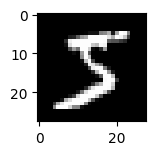

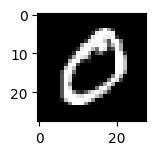

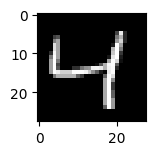

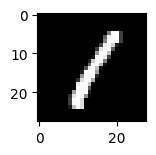

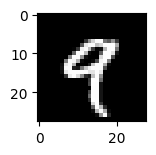

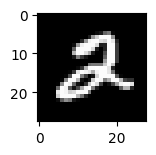

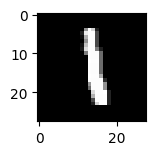

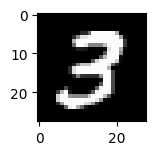

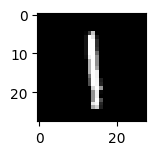

In [3]:
for i in range(9):
	# define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    # show the figure
    plt.show()

### reshaped to 3d

In [4]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

### normalizing

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### one-Hot encoding of target labels 

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Defining the model

In [20]:
model = tf.keras.Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
    
])

## Visualize the model

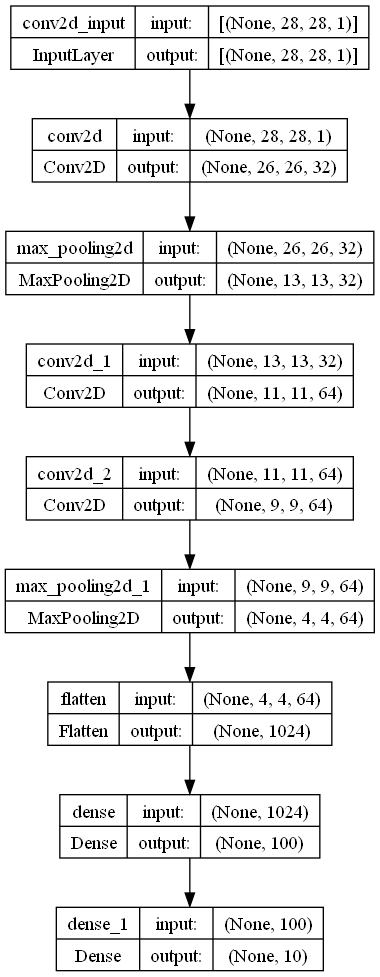

In [8]:
plot_model(model,to_file='model.png',show_shapes = True)


## Compile the model

In [21]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

## Train the model and evaluate

In [23]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1366 - accuracy: 0.9577
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0454 - accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0318 - accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0187 - accuracy: 0.9939
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0152 - accuracy: 0.9954
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0094 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0094 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 37s 20m

## Save final model

In [25]:
model.save("final_model.h5")

## Evaluate final model on test set


In [26]:
model = load_model("final_model.h5")
acc = model.evaluate(x_test,y_test,verbose=0)
print("loss=",acc[0],"accuracy=",acc[1]*100)

loss= 0.04242072254419327 accuracy= 99.07000064849854


In [27]:
x_samples = x_test[:5]
predictions= model.predict(x_samples_test)
predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels)

1/1 [==============================] - 0s 48ms/step
[7 2 1 0 4]


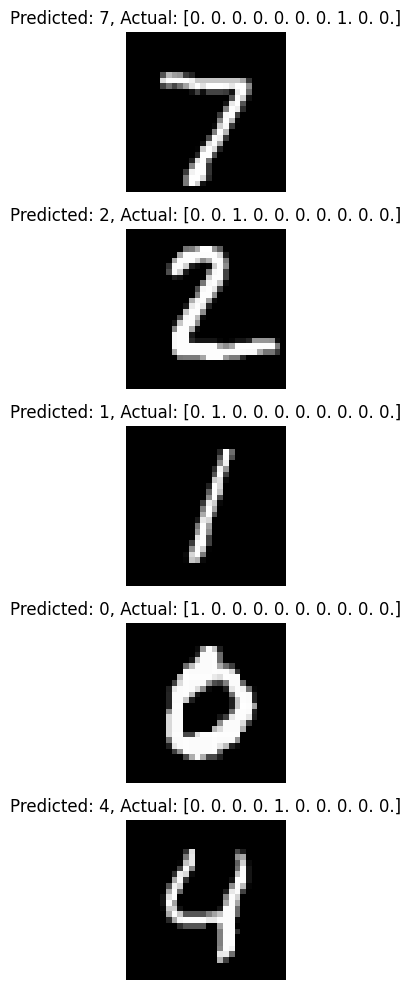

In [28]:
# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 10))  # Updated the subplot layout

# Iterate over the images, predicted labels, and actual labels
for i, (image, predicted_label, actual_label) in enumerate(zip(x_samples, predicted_labels, y_test[:5])):
    ax = axes[i]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


## Prediction on unseen data

In [29]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
img = load_img('sample_image.png', color_mode = "grayscale",target_size=(28,28))
img = img_to_array(img)
img = img.reshape(-1,28,28,1)
img = img/255.0

In [30]:
predict_value = model.predict(img)
digit = np.argmax(predict_value)
print(digit)

1/1 [==============================] - 0s 17ms/step
7
